# High Variance vs High Bias

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import time
from sklearn.datasets import load_boston

In [2]:
input_feature = 'RM'
target_feature = 'MEDV'
boston_dataset = load_boston()
boston_df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston_df[target_feature] = boston_dataset.target

/home/gabry/Dataspell/PolynomialRegression/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

In [3]:
boston_df_shuffled = boston_df.sample(frac=1)

In [4]:
X = boston_df_shuffled[[input_feature]]
y = boston_df_shuffled[[target_feature]]

In [5]:
train_X = X.iloc[:int(X.shape[0]*0.6),:]
train_y = y.iloc[:int(y.shape[0]*0.6),:]

val_X = X.iloc[int(X.shape[0]*0.6):int(X.shape[0]*0.8),:]
val_y = y.iloc[int(y.shape[0]*0.6):int(y.shape[0]*0.8),:]

test_X = X.iloc[int(X.shape[0]*0.8):,:]
test_y = y.iloc[int(y.shape[0]*0.8):,:]

In [6]:
def polynomial_features(dataframe, degree):
    df = dataframe.copy()
    feature_name = dataframe.columns[0]
    for i in range(1,degree):
        key = "{}^{}".format(feature_name,i+1)
        df[key] = df[feature_name]**(i+1)
    return df

In [20]:
def computeCostVectorizedReg(X, y, theta = np.zeros((X.shape[1],1)), l = 0.0):
    J = 0
    m = X.shape[0]
    elapsed_time = -time.time()
    J = 1/(2*m) * ((X.dot(theta) - y).T.dot(X.dot(theta) - y) + l*theta[1:].T.dot(theta[1:]))
    elapsed_time += time.time()
    elapsed_time_ms = np.round(elapsed_time*1000,3)
    return J.values,elapsed_time_ms

In [7]:
def normalEquationReg(X,y, l =0.0):
    Ir = np.identity(X.shape[1])
    Ir[0][0] = 0
    etime = -time.time()
    theta = np.linalg.pinv(X.T.dot(X) + l*Ir).dot(X.T).dot(y)
    etime += time.time()
    etime = np.round(etime*1000,3)
    return theta, etime

In [36]:
X_poly_2_train = polynomial_features(train_X,2)
X_poly_2_val = polynomial_features(val_X,2)
X_poly_2_test = polynomial_features(test_X,2)

X_poly_3_train = polynomial_features(train_X,3)
X_poly_3_val = polynomial_features(val_X,3)
X_poly_3_test = polynomial_features(test_X,3)

X_poly_4_train = polynomial_features(train_X,4)
X_poly_4_val = polynomial_features(val_X,4)
X_poly_4_test = polynomial_features(test_X,4)

X_poly_5_train = polynomial_features(train_X,5)
X_poly_5_val = polynomial_features(val_X,5)
X_poly_5_test = polynomial_features(test_X,5)

X_poly_6_train = polynomial_features(train_X,6)
X_poly_6_val = polynomial_features(val_X,6)
X_poly_6_test = polynomial_features(test_X,6)

X_poly_7_train = polynomial_features(train_X,7)
X_poly_7_val = polynomial_features(val_X,7)
X_poly_7_test = polynomial_features(test_X,7)

X_poly_8_train = polynomial_features(train_X,8)
X_poly_8_val = polynomial_features(val_X,8)
X_poly_8_test = polynomial_features(test_X,8)

In [37]:
X_linear_train = np.c_[np.ones((train_X.shape[0],1)), train_X]
X_linear_val = np.c_[np.ones((val_X.shape[0],1)), val_X]
X_linear_test = np.c_[np.ones((test_X.shape[0],1)), test_X]

X_poly_2_int_train = np.c_[np.ones((X_poly_2_train.shape[0],1)),X_poly_2_train]
X_poly_2_int_val = np.c_[np.ones((X_poly_2_val.shape[0],1)),X_poly_2_val]
X_poly_2_int_test = np.c_[np.ones((X_poly_2_test.shape[0],1)),X_poly_2_test]

X_poly_3_int_train = np.c_[np.ones((X_poly_3_train.shape[0],1)),X_poly_3_train]
X_poly_3_int_val = np.c_[np.ones((X_poly_3_val.shape[0],1)),X_poly_3_val]
X_poly_3_int_test = np.c_[np.ones((X_poly_3_test.shape[0],1)),X_poly_3_test]

X_poly_4_int_train = np.c_[np.ones((X_poly_4_train.shape[0],1)),X_poly_4_train]
X_poly_4_int_val = np.c_[np.ones((X_poly_4_val.shape[0],1)),X_poly_4_val]
X_poly_4_int_test = np.c_[np.ones((X_poly_4_test.shape[0],1)),X_poly_4_test]

X_poly_5_int_train = np.c_[np.ones((X_poly_5_train.shape[0],1)),X_poly_5_train]
X_poly_5_int_val = np.c_[np.ones((X_poly_5_val.shape[0],1)),X_poly_5_val]
X_poly_5_int_test = np.c_[np.ones((X_poly_5_test.shape[0],1)),X_poly_5_test]

X_poly_6_int_train = np.c_[np.ones((X_poly_6_train.shape[0],1)),X_poly_6_train]
X_poly_6_int_val = np.c_[np.ones((X_poly_6_val.shape[0],1)),X_poly_6_val]
X_poly_6_int_test = np.c_[np.ones((X_poly_6_test.shape[0],1)),X_poly_6_test]

X_poly_7_int_train = np.c_[np.ones((X_poly_7_train.shape[0],1)),X_poly_7_train]
X_poly_7_int_val = np.c_[np.ones((X_poly_7_val.shape[0],1)),X_poly_7_val]
X_poly_7_int_test = np.c_[np.ones((X_poly_7_test.shape[0],1)),X_poly_7_test]

X_poly_8_int_train = np.c_[np.ones((X_poly_8_train.shape[0],1)),X_poly_8_train]
X_poly_8_int_val = np.c_[np.ones((X_poly_8_val.shape[0],1)),X_poly_8_val]
X_poly_8_int_test = np.c_[np.ones((X_poly_8_test.shape[0],1)),X_poly_8_test]

In [38]:
theta_1,_ = normalEquationReg(X_linear_train,train_y)
theta_2,_ = normalEquationReg(X_poly_2_int_train,train_y)
theta_3,_ = normalEquationReg(X_poly_3_int_train,train_y)
theta_4,_ = normalEquationReg(X_poly_4_int_train,train_y)
theta_5,_ = normalEquationReg(X_poly_5_int_train,train_y)
theta_6,_ = normalEquationReg(X_poly_6_int_train,train_y)
theta_7,_ = normalEquationReg(X_poly_7_int_train,train_y)
theta_8,_ = normalEquationReg(X_poly_8_int_train,train_y)

## Computer the error on training and validations set

In [39]:
J_train_1,_ = computeCostVectorizedReg(X_linear_train,train_y,theta_1)
J_train_2,_ = computeCostVectorizedReg(X_poly_2_int_train,train_y,theta_2)
J_train_3,_ = computeCostVectorizedReg(X_poly_3_int_train,train_y,theta_3)
J_train_4,_ = computeCostVectorizedReg(X_poly_4_int_train,train_y,theta_4)
J_train_5,_ = computeCostVectorizedReg(X_poly_5_int_train,train_y,theta_5)
J_train_6,_ = computeCostVectorizedReg(X_poly_6_int_train,train_y,theta_6)
J_train_7,_ = computeCostVectorizedReg(X_poly_7_int_train,train_y,theta_7)
J_train_8,_ = computeCostVectorizedReg(X_poly_8_int_train,train_y,theta_8)

In [40]:
J_train_list = []
J_train_list.append(J_train_1.ravel()[0])
J_train_list.append(J_train_2.ravel()[0])
J_train_list.append(J_train_3.ravel()[0])
J_train_list.append(J_train_4.ravel()[0])
J_train_list.append(J_train_5.ravel()[0])
J_train_list.append(J_train_6.ravel()[0])
J_train_list.append(J_train_7.ravel()[0])
J_train_list.append(J_train_8.ravel()[0])

In [41]:
J_val_1,_ = computeCostVectorizedReg(X_linear_val,val_y,theta_1)
J_val_2,_ = computeCostVectorizedReg(X_poly_2_int_val,val_y,theta_2)
J_val_3,_ = computeCostVectorizedReg(X_poly_3_int_val,val_y,theta_3)
J_val_4,_ = computeCostVectorizedReg(X_poly_4_int_val,val_y,theta_4)
J_val_5,_ = computeCostVectorizedReg(X_poly_5_int_val,val_y,theta_5)
J_val_6,_ = computeCostVectorizedReg(X_poly_6_int_val,val_y,theta_6)
J_val_7,_ = computeCostVectorizedReg(X_poly_7_int_val,val_y,theta_7)
J_val_8,_ = computeCostVectorizedReg(X_poly_8_int_val,val_y,theta_8)

In [42]:
J_val_list = []
J_val_list.append(J_val_1.ravel()[0])
J_val_list.append(J_val_2.ravel()[0])
J_val_list.append(J_val_3.ravel()[0])
J_val_list.append(J_val_4.ravel()[0])
J_val_list.append(J_val_5.ravel()[0])
J_val_list.append(J_val_6.ravel()[0])
J_val_list.append(J_val_7.ravel()[0])
J_val_list.append(J_val_8.ravel()[0])

## Trade-off between High Bias and High Variance wrt the polynomial degree

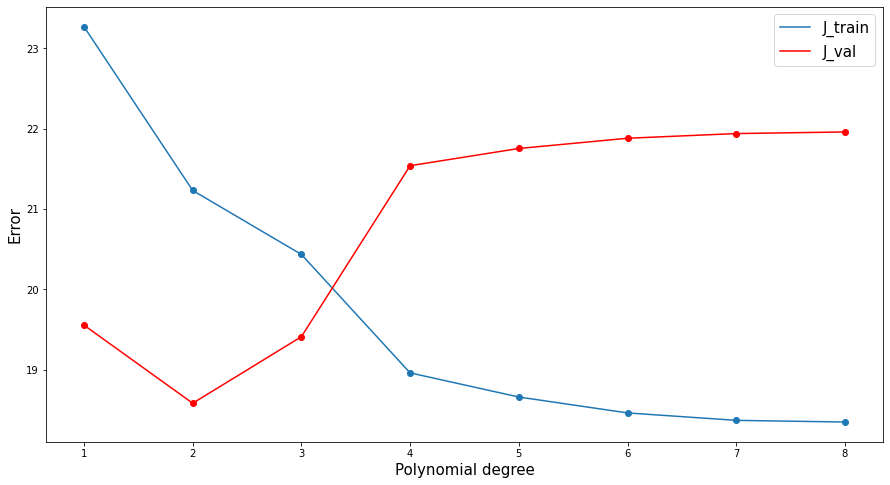

In [44]:
plt.figure(figsize=(15,8))

plt.scatter(np.arange(8)+1,J_train_list)
plt.plot(np.arange(8)+1,J_train_list, label='J_train')

plt.scatter(np.arange(8)+1,J_val_list,color='r')
plt.plot(np.arange(8)+1,J_val_list, label='J_val',color='r')

plt.xlabel("Polynomial degree",fontsize=15)
plt.ylabel("Error",fontsize=15)
plt.legend(fontsize=15)
plt.show()

## Trade-off between High Bias and High Variance wrt the regularization parameter

In [45]:
d = 6

poly_xx_train = polynomial_features(train_X,d)
poly_xx_val = polynomial_features(val_X,d)
poly_xx_test = polynomial_features(test_X,d)

poly_xx_train_int = np.c_[np.ones((poly_xx_train.shape[0],1)),poly_xx_train]
poly_xx_val_int = np.c_[np.ones((poly_xx_val.shape[0],1)),poly_xx_val]
poly_xx_test_int = np.c_[np.ones((poly_xx_test.shape[0],1)),poly_xx_test]

In [105]:
lambda_values = [10,100,1000,10000,100000,1000000,10000000,100000000,1000000000,10000000000,100000000000]

In [106]:
J_train_xx = []
J_val_xx = []

for l in lambda_values:
    theta_xx,_ = normalEquationReg(poly_xx_train_int,train_y,l)
    J_t_xx,_ = computeCostVectorizedReg(poly_xx_train_int,train_y,theta_xx)
    J_v_xx,_ = computeCostVectorizedReg(poly_xx_val_int,val_y,theta_xx)
    J_train_xx.append(J_t_xx.ravel()[0])
    J_val_xx.append(J_v_xx.ravel()[0])


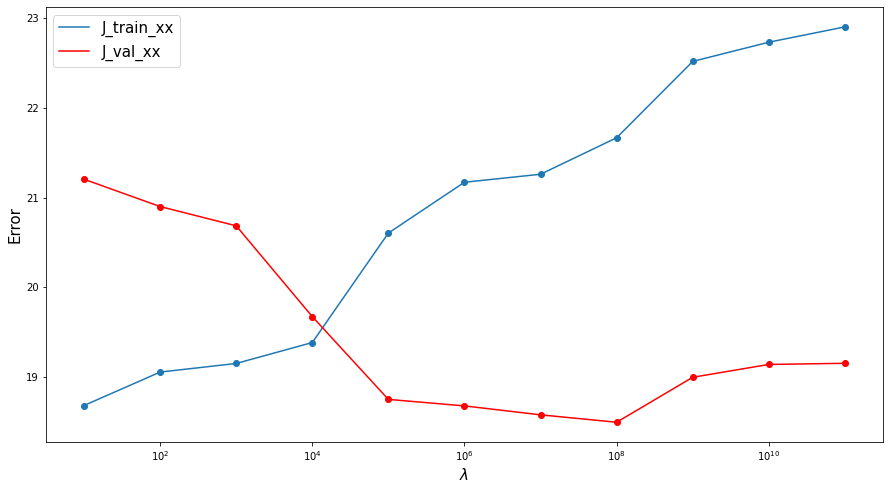

In [107]:
plt.figure(figsize=(15,8))

plt.scatter(lambda_values,J_train_xx)
plt.plot(lambda_values,J_train_xx, label='J_train_xx')

plt.scatter(lambda_values,J_val_xx,color='r')
plt.plot(lambda_values, J_val_xx, label='J_val_xx', color='r')

plt.xlabel(r"$\lambda$",fontsize=15)
plt.ylabel("Error",fontsize=15)

plt.xscale('log')
plt.legend(fontsize=15)
plt.show()